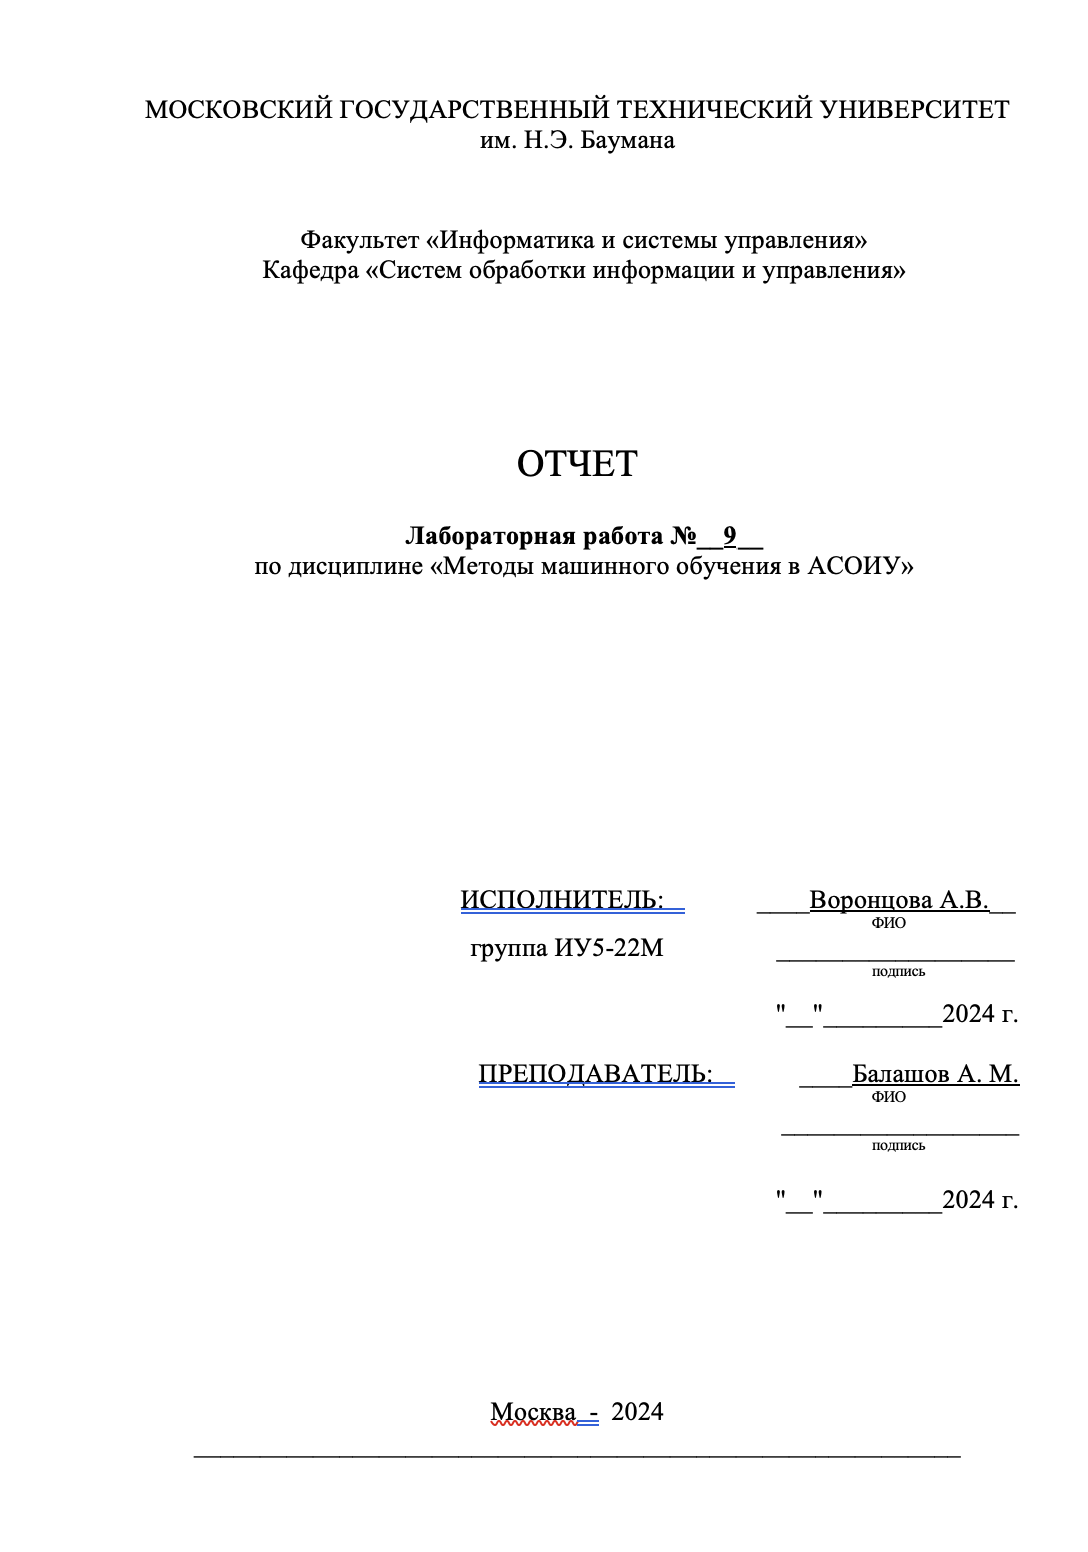

### **Задание:**
Для произвольного набора данных, предназначенного для классификации текстов, решите задачу классификации текста двумя способами:

- На основе CountVectorizer или TfidfVectorizer.
- На основе моделей word2vec или Glove или fastText.

Сравните качество полученных моделей.

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split

# Загрузка данных
data = fetch_20newsgroups(subset='all', shuffle=True, remove=('headers', 'footers', 'quotes'))
texts = data.data
labels = data.target

# Разделение на обучающую и тестовую выборки
texts_train, texts_test, labels_train, labels_test = train_test_split(texts, labels, test_size=0.2, random_state=42)


### Способ 1: Использование TfidfVectorizer

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# Создание модели с TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
model = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=1000))
model.fit(texts_train, labels_train)

# Предсказание и оценка модели
predicted = model.predict(texts_test)
print(classification_report(labels_test, predicted))


              precision    recall  f1-score   support

           0       0.57      0.56      0.56       151
           1       0.68      0.67      0.68       202
           2       0.70      0.65      0.67       195
           3       0.64      0.67      0.65       183
           4       0.82      0.72      0.76       205
           5       0.83      0.78      0.81       215
           6       0.70      0.72      0.71       193
           7       0.77      0.72      0.74       196
           8       0.43      0.79      0.56       168
           9       0.78      0.83      0.81       211
          10       0.92      0.86      0.89       198
          11       0.91      0.74      0.82       201
          12       0.67      0.71      0.69       202
          13       0.81      0.86      0.83       194
          14       0.74      0.81      0.78       189
          15       0.68      0.77      0.72       202
          16       0.75      0.73      0.74       188
          17       0.84    

### Способ 2: Использование модели word2vec

Для использования word2vec можно воспользоваться предобученной моделью из библиотеки gensim.

In [5]:
import gensim.downloader as api
from sklearn.svm import SVC
import numpy as np

# Загрузка предобученной модели word2vec
wv = api.load('word2vec-google-news-300')

# Функция для получения вектора текста
def text_to_vector(text):
    words = [word for word in text.lower().split() if word in wv]
    if len(words) >= 1:
        return np.mean(wv[words], axis=0)
    else:
        return np.zeros(300)

# Векторизация текстов
train_vectors = [text_to_vector(text) for text in texts_train]
test_vectors = [text_to_vector(text) for text in texts_test]

# Обучение модели SVM
svm_model = SVC(kernel='linear')
svm_model.fit(train_vectors, labels_train)

# Предсказание и оценка модели
predicted_w2v = svm_model.predict(test_vectors)
print(classification_report(labels_test, predicted_w2v))


              precision    recall  f1-score   support

           0       0.31      0.48      0.38       151
           1       0.44      0.46      0.45       202
           2       0.54      0.45      0.49       195
           3       0.40      0.54      0.46       183
           4       0.48      0.35      0.40       205
           5       0.61      0.60      0.60       215
           6       0.65      0.63      0.64       193
           7       0.41      0.56      0.47       196
           8       0.46      0.60      0.52       168
           9       0.74      0.70      0.72       211
          10       0.77      0.77      0.77       198
          11       0.68      0.61      0.64       201
          12       0.59      0.49      0.53       202
          13       0.81      0.74      0.78       194
          14       0.69      0.66      0.68       189
          15       0.58      0.76      0.66       202
          16       0.56      0.64      0.60       188
          17       0.73    

Из представленных результатов видно, что были получены два различных набора метрик для оценки производительности классификационной модели на одном и том же наборе данных:

1. Точность (Precision):
   - В первом случае средняя точность (macro avg) составляет 0.73
   - Во втором случае средняя точность снижается до 0.56, а взвешенная точность также до 0.57.

2. Полнота (Recall):
   - В первом случае средняя полнота составляет 0.71, а взвешенная полнота — 0.72.
   - Во втором случае средняя полнота уменьшается до 0.56, а взвешенная полнота — до 0.57.

3. F1-оценка (F1-Score):
   - В первом случае средняя F1-оценка равна 0.71, а взвешенная F1-оценка — 0.72.
   - Во втором случае средняя F1-оценка уменьшается до 0.55, а взвешенная F1-оценка — до 0.56.

4. Общая точность (Accuracy):
   - В первом случае общая точность модели составляет 0.72.
   - Во втором случае общая точность снижается до 0.57.

### Анализ:
- Первый набор результатов демонстрирует значительно лучшую производительность по всем ключевым метрикам по сравнению со вторым набором. Это указывает на то, что модель в первом случае работает более эффективно.
- Например, класс "19" во втором случае имеет очень низкий показатель полноты и F1-оценки, что может указывать на проблемы с распознаванием или малое количество данных для этого класса.
